### **1. sklearn 라이브러리 iris 데이터 불러오기**

In [30]:
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from dtreeplt import dtreeplt

In [31]:
iris_dataset = datasets.load_iris()

In [32]:
## data split
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 58)

In [33]:
# 객체 생성
clf = tree.DecisionTreeClassifier()

In [34]:
# 모델링
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
print('train set score : {:.3f}'.format(clf.score(X_train, y_train)))
print('test set score : {:.3f}'.format(clf.score(X_test, y_test)))

train set score : 1.000
test set score : 0.933


In [36]:
dtree = dtreeplt(
    model = clf,
    feature_names = iris_dataset.feature_names,
    target_names = iris_dataset.target_names
)

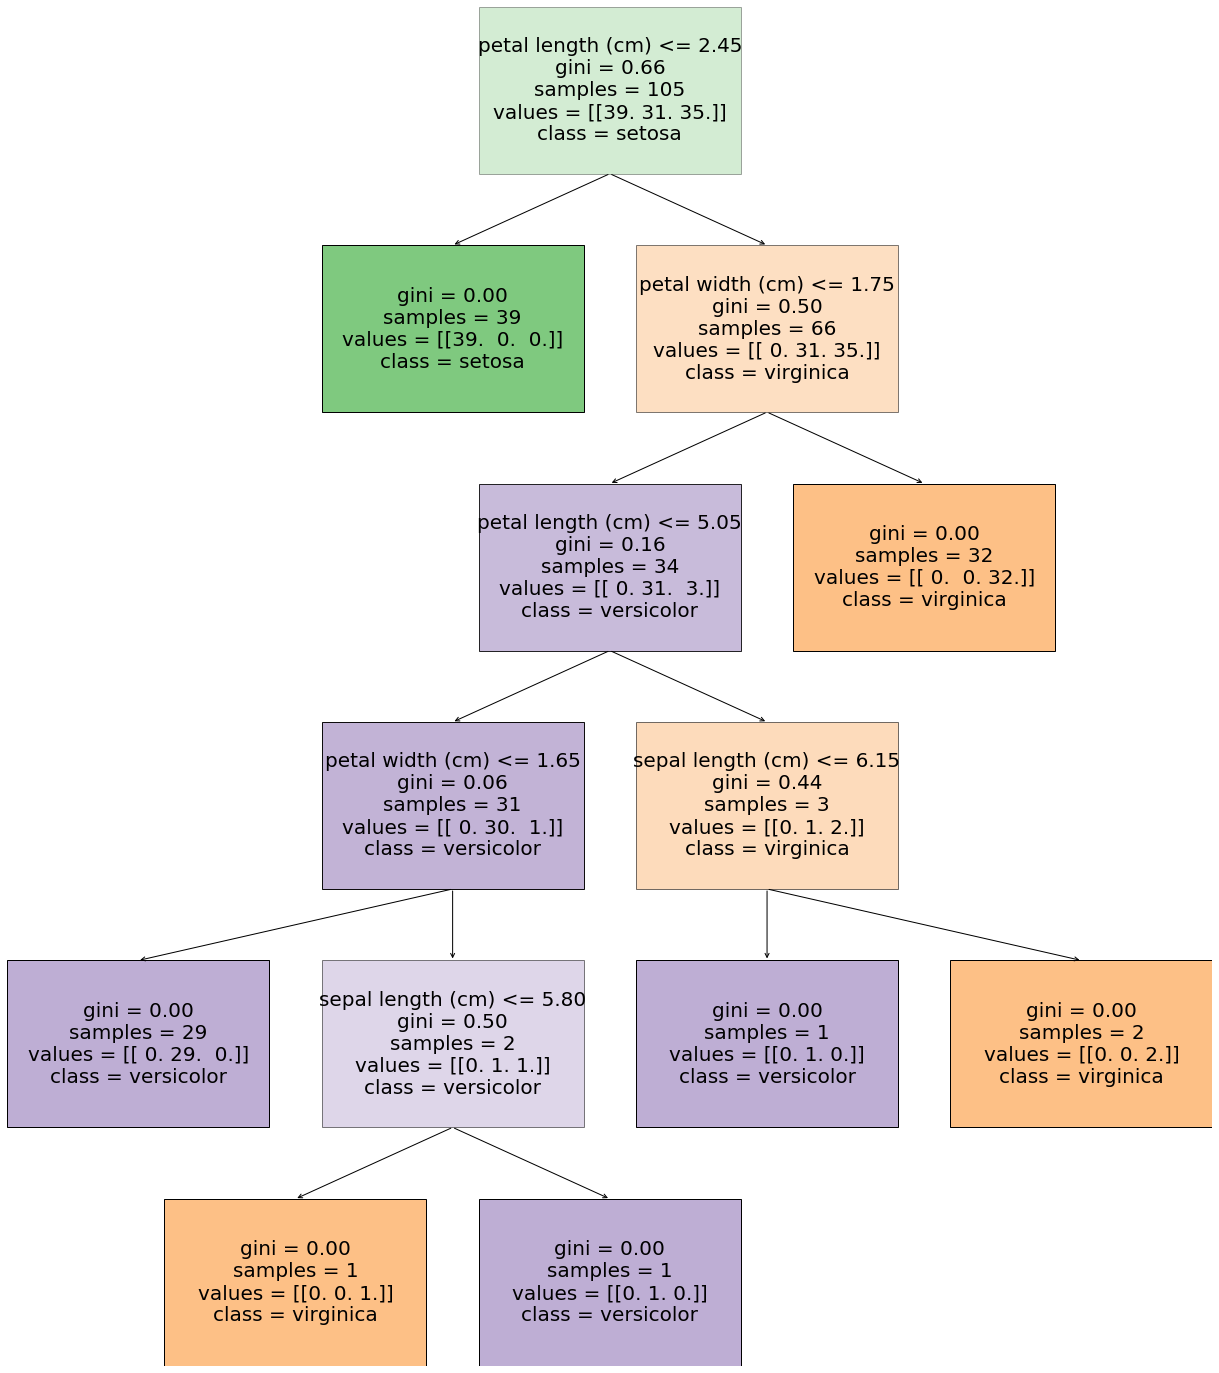

In [37]:
fig = dtree.view()

In [39]:
fig.savefig('dtree.png')

- 결정트리의 복잡도 제어 --> 과대적합의 방지
- 사전가지치기(prunning)

In [40]:
# 객체 생성
clf1 = tree.DecisionTreeClassifier(max_depth = 3)

In [41]:
# 모델링
clf1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [42]:
print('train set score : {:.3f}'.format(clf1.score(X_train, y_train)))
print('test set score : {:.3f}'.format(clf1.score(X_test, y_test)))

train set score : 0.981
test set score : 0.956


- 변수 중요도(feature importance) --> 0 ~ 1사이 값

In [43]:
## 한글 폰트 설정
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rc

In [55]:
font_name = fm.FontProperties(fname='c:/windows/fonts/malgun.ttf').get_name()
rc('font',family=font_name)

In [56]:
# 변수 중요도 보기
clf1.feature_importances_

array([0.        , 0.        , 0.03314601, 0.96685399])

(-1, 4)

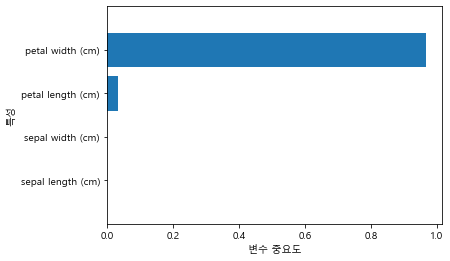

In [57]:
n_features = iris_dataset.data.shape[1]
plt.barh(range(n_features), clf1.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), iris_dataset.feature_names)
plt.xlabel('변수 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)

In [58]:
clf1.predict(X_test)

array([1, 1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1, 2, 0,
       0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0,
       1])

In [59]:
clf1.predict_proba(X_test)

array([[0.        , 0.96774194, 0.03225806],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96774194, 0.03225806],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96774194, 0.03225806],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.